In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#http://emmanuelle.github.io/a-tutorial-on-segmentation.html

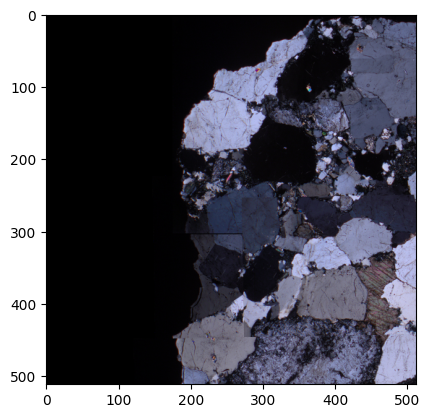

In [3]:
from skimage.color import rgb2gray
from skimage import img_as_float
img = cv2.imread('img.png', cv2.IMREAD_COLOR) #  IMREAD_GRAYSCALE
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
nchannels = np.asarray(img).shape[-1] if len(np.asarray(img).shape) == 3 else 1
w = 512
nx, ny = 0,0
img_np = np.asarray(img)[nx*w:(nx+1)*w,ny*w:(ny+1)*w]
plt.imshow(img_np)

In [4]:
from scipy import ndimage as ndi
from skimage import morphology
from skimage.restoration import denoise_nl_means
im_denoised = rgb2gray(img_as_float(cv2.fastNlMeansDenoisingColored(img_np, None,15,10,3,50)))

hat = morphology.dilation(hat)
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2, figsize=(10,10))
ax1.imshow(im_denoised)
lap = ndi.gaussian_laplace(im_denoised, 0.2)
lap = np.sqrt(np.abs(ndi.laplace(lap)))
lapd  = denoise_nl_means(lap, h=1, patch_size=3, patch_distance=21)
hat = ndi.white_tophat(lapd, 10)
#hat -= 0.3 * im_denoised
#hat -= np.maximum(hat,0)
ax2.imshow(lapd)

ax3.imshow(lap)
ax4.imshow(hat)

NameError: name 'hat' is not defined

(array([2.0551e+04, 5.4000e+01, 1.1000e+01, 3.6840e+03, 3.5310e+03,
        3.4550e+03, 2.7910e+03, 1.6940e+03, 4.8000e+03, 2.9470e+03,
        5.0410e+03, 5.1380e+03, 9.2670e+03, 6.5470e+03, 4.2980e+03,
        5.4740e+03, 5.2940e+03, 1.5857e+04, 7.3320e+03, 4.1720e+03,
        5.6720e+03, 5.3460e+03, 4.5130e+03, 4.8820e+03, 4.2620e+03,
        1.0543e+04, 3.7540e+03, 3.4590e+03, 4.2360e+03, 3.3460e+03,
        6.2190e+03, 2.8290e+03, 2.9450e+03, 3.3390e+03, 2.4460e+03,
        3.7200e+03, 2.4880e+03, 2.4420e+03, 2.2430e+03, 2.5990e+03,
        2.1270e+03, 2.1700e+03, 1.7910e+03, 2.2610e+03, 1.7620e+03,
        1.8330e+03, 1.5600e+03, 2.0180e+03, 1.6040e+03, 1.6290e+03,
        1.6910e+03, 1.4940e+03, 1.4840e+03, 1.5300e+03, 1.4290e+03,
        1.2300e+03, 1.4060e+03, 1.3250e+03, 1.2410e+03, 1.2980e+03,
        1.1190e+03, 1.2030e+03, 1.1870e+03, 1.0660e+03, 1.0350e+03,
        1.1090e+03, 9.4600e+02, 9.9300e+02, 9.7500e+02, 9.5500e+02,
        8.2000e+02, 8.7300e+02, 8.5500e+02, 8.41

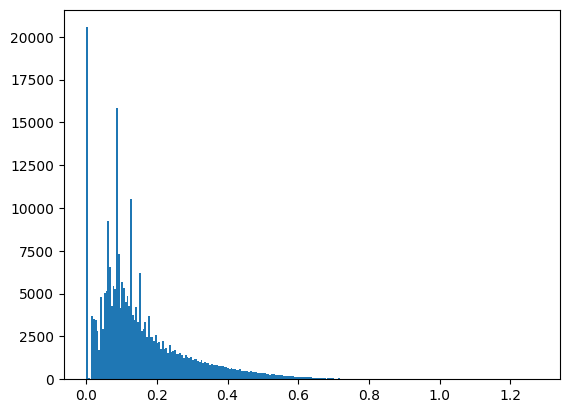

In [51]:
plt.hist(lap.flatten(), bins=256)

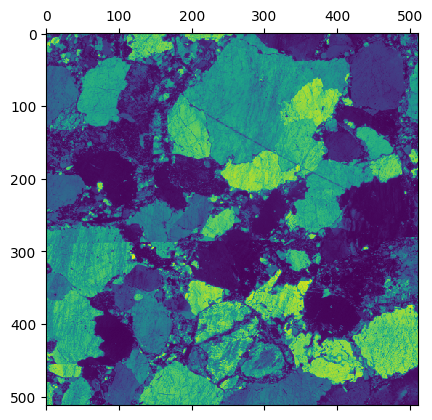

In [86]:
from skimage import data, filters
imw = rgb2gray(img_as_float(img_np))
plt.matshow(imw)

0.8567840483704598 0.0002531842335660928


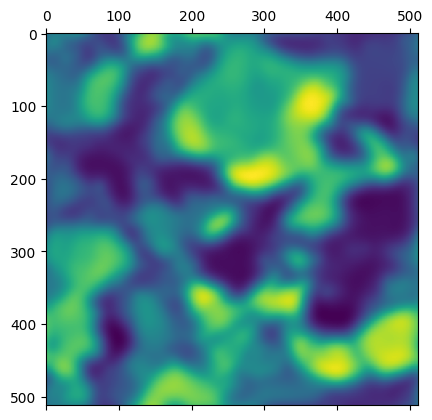

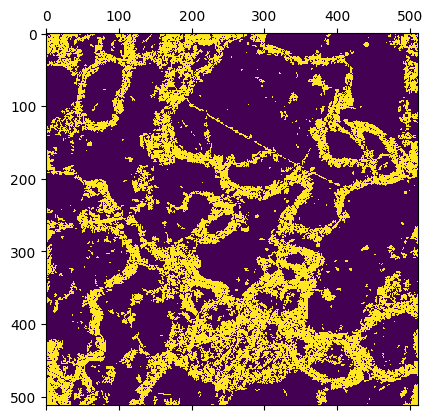

In [134]:
low = filters.butterworth(imw, 0.02, False, 2)
high = filters.butterworth(imw, 0.03, True, 5)
plt.matshow(low)
high = np.sqrt(np.abs(high))
print(np.max(high), np.min(high))
binary = filters.apply_hysteresis_threshold(high,0.3, 0.45)
plt.matshow(binary)

(512, 512)


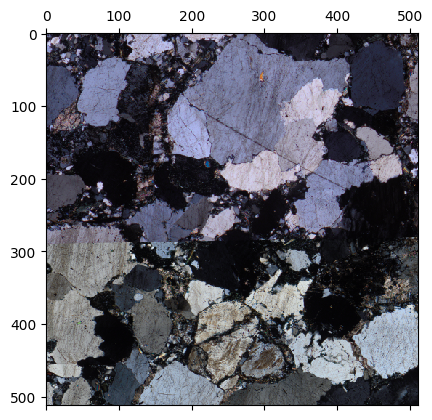

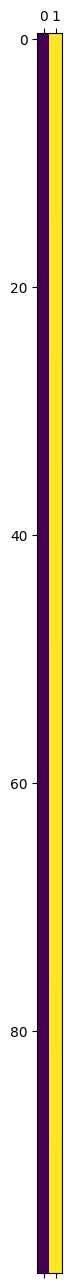

In [164]:
high = np.abs(filters.sobel(filters.gaussian(imw, 2)))
print(high.shape)
from skimage import segmentation
#plt.matshow(filters.threshold_isodata(high, 256)*0.8<high)
plt.matshow(img_np)
plt.matshow(segmentation.active_contour(high,np.random.rand(100,2)), )

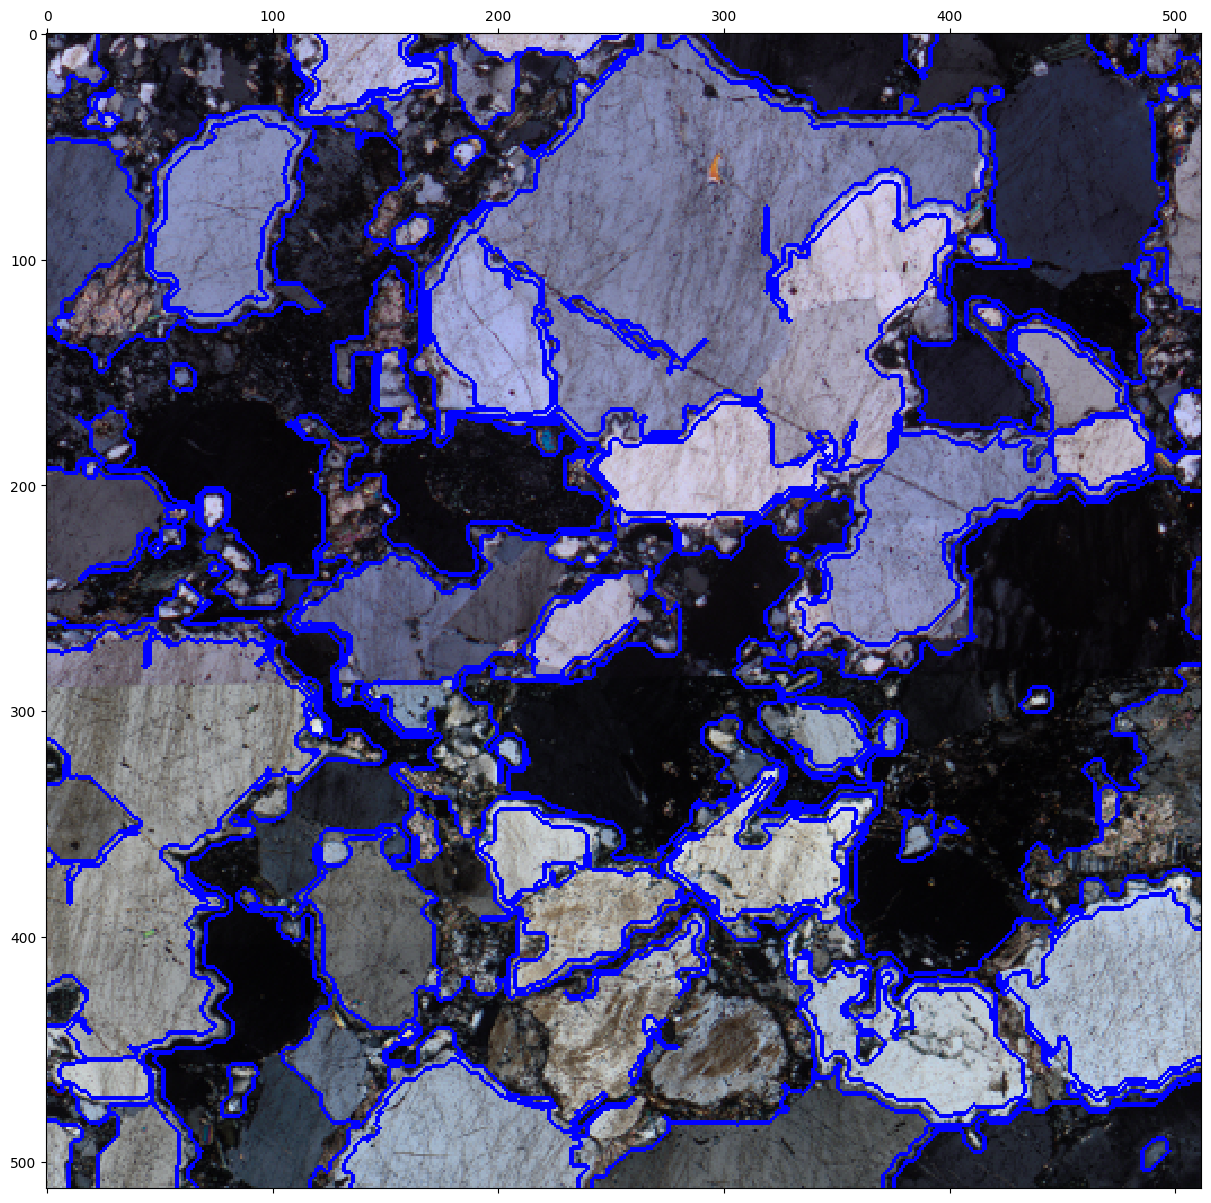

In [198]:
test = segmentation.felzenszwalb(img_np, scale=300, sigma=2, min_size=100)
fig, ax = plt.subplots(figsize=(15,15))

test_clean = morphology.remove_small_objects(test + 1, min_size=100)

disp = img_np.copy()
disp[segmentation.find_boundaries(test_clean)> 0] = (1,1,255)
ax.matshow(disp)

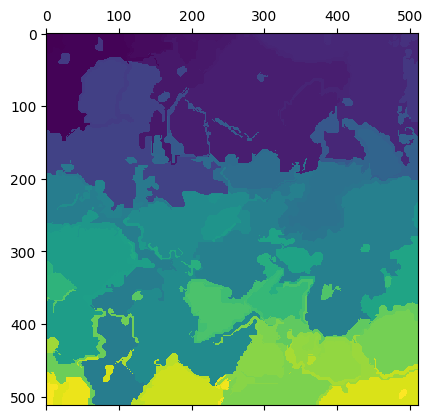

In [196]:
plt.matshow(test_clean)

In [26]:
from skimage import segmentation
from skimage.restoration import denoise_nl_means
gg = segmentation.quickshift(img_np, 0.7, 9, convert2lab=True, sigma=0)
#denoise_nl_means(img_np, h=1,patch_size=3, patch_distance=21)

222


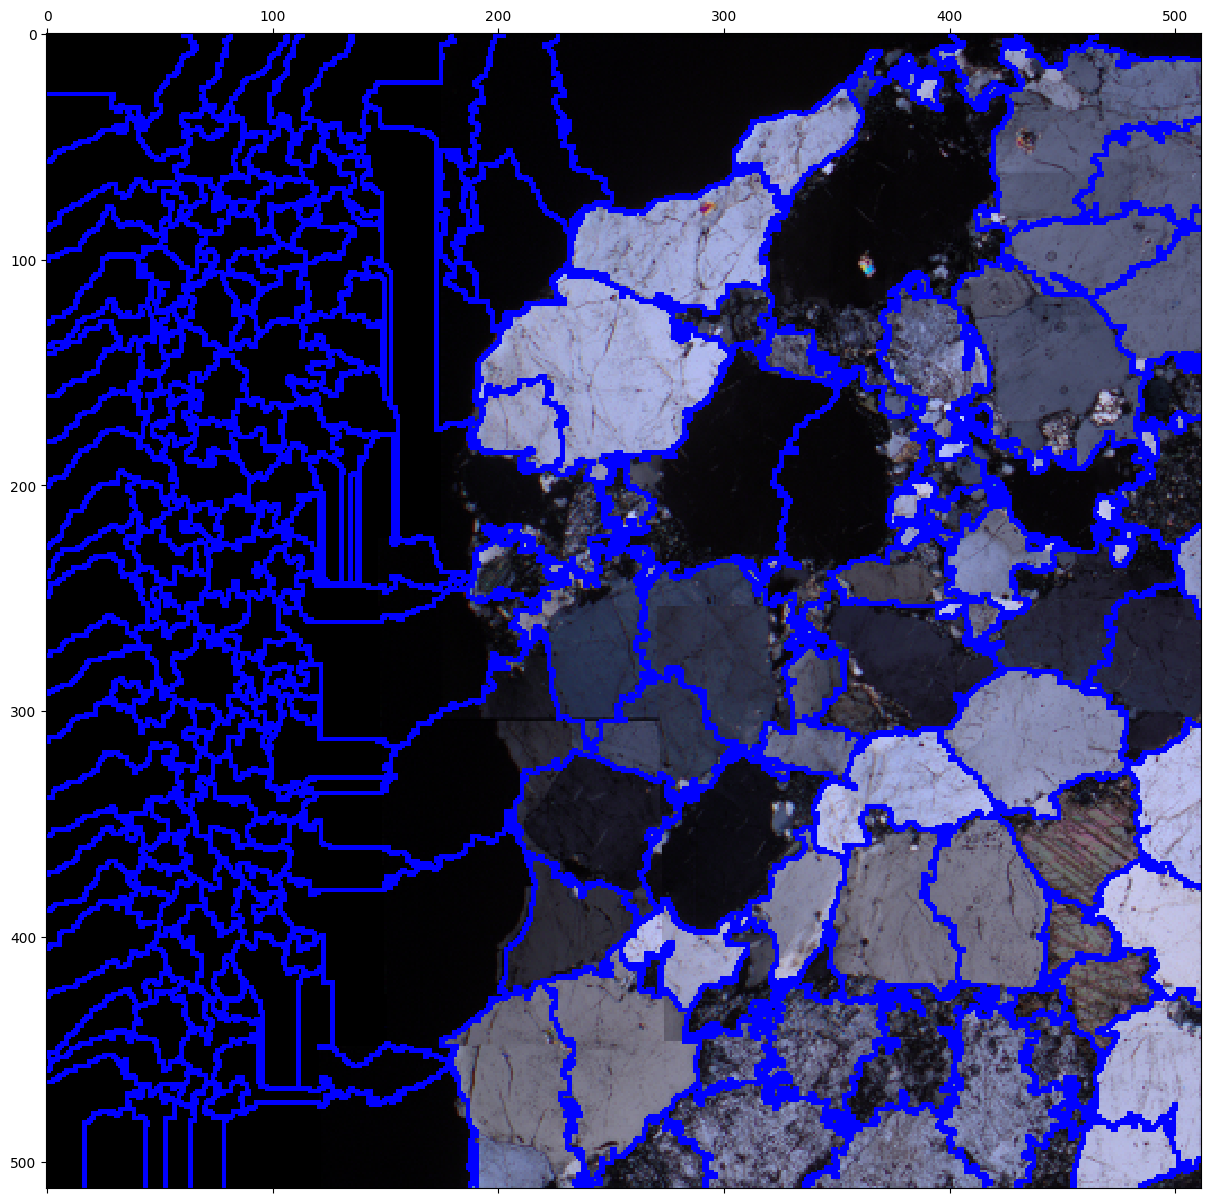

In [32]:
from skimage.morphology import remove_small_holes, remove_small_objects
gg2 = np.zeros_like(gg).astype(np.int64)
for i in range(gg.max()):
     cur = gg==i
     cur = ~remove_small_objects(~cur, 100, connectivity=2)
     cur = remove_small_objects(cur, 100, connectivity=2)
     gg2[cur] = i

#gg2 = remove_small_objects(gg, min_size=12000)
disp = img_np.copy()
disp[segmentation.find_boundaries(gg2, connectivity=2, )> 0] = (1,1,255)
gg2,_,_=segmentation.relabel_sequential(gg2)
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(disp)
print(gg2.max())

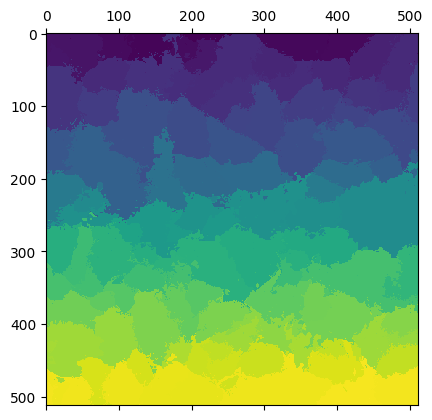

In [309]:
plt.matshow(gg)

In [108]:
from skimage import segmentation
from skimage.restoration import denoise_nl_means
gg = segmentation.quickshift(img, 0.7, 9, convert2lab=True, sigma=0.1, max_dist=20)

In [37]:
from tqdm import trange
gg2 = np.zeros_like(gg).astype(np.int64)
for i in trange(gg.max()):
     cur = gg==i
     cur = ~remove_small_objects(~cur, 100, connectivity=2)
     cur = remove_small_objects(cur, 100, connectivity=2)
     gg2[cur] = i

  1%|          | 108/11350 [00:17<31:04,  6.03it/s]


KeyboardInterrupt: 

In [ ]:
disp = img_np.copy()
disp[segmentation.find_boundaries(gg2, connectivity=2, )> 0] = (1,1,255)
gg2,_,_=segmentation.relabel_sequential(gg2)
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(disp)
print(gg2.max())

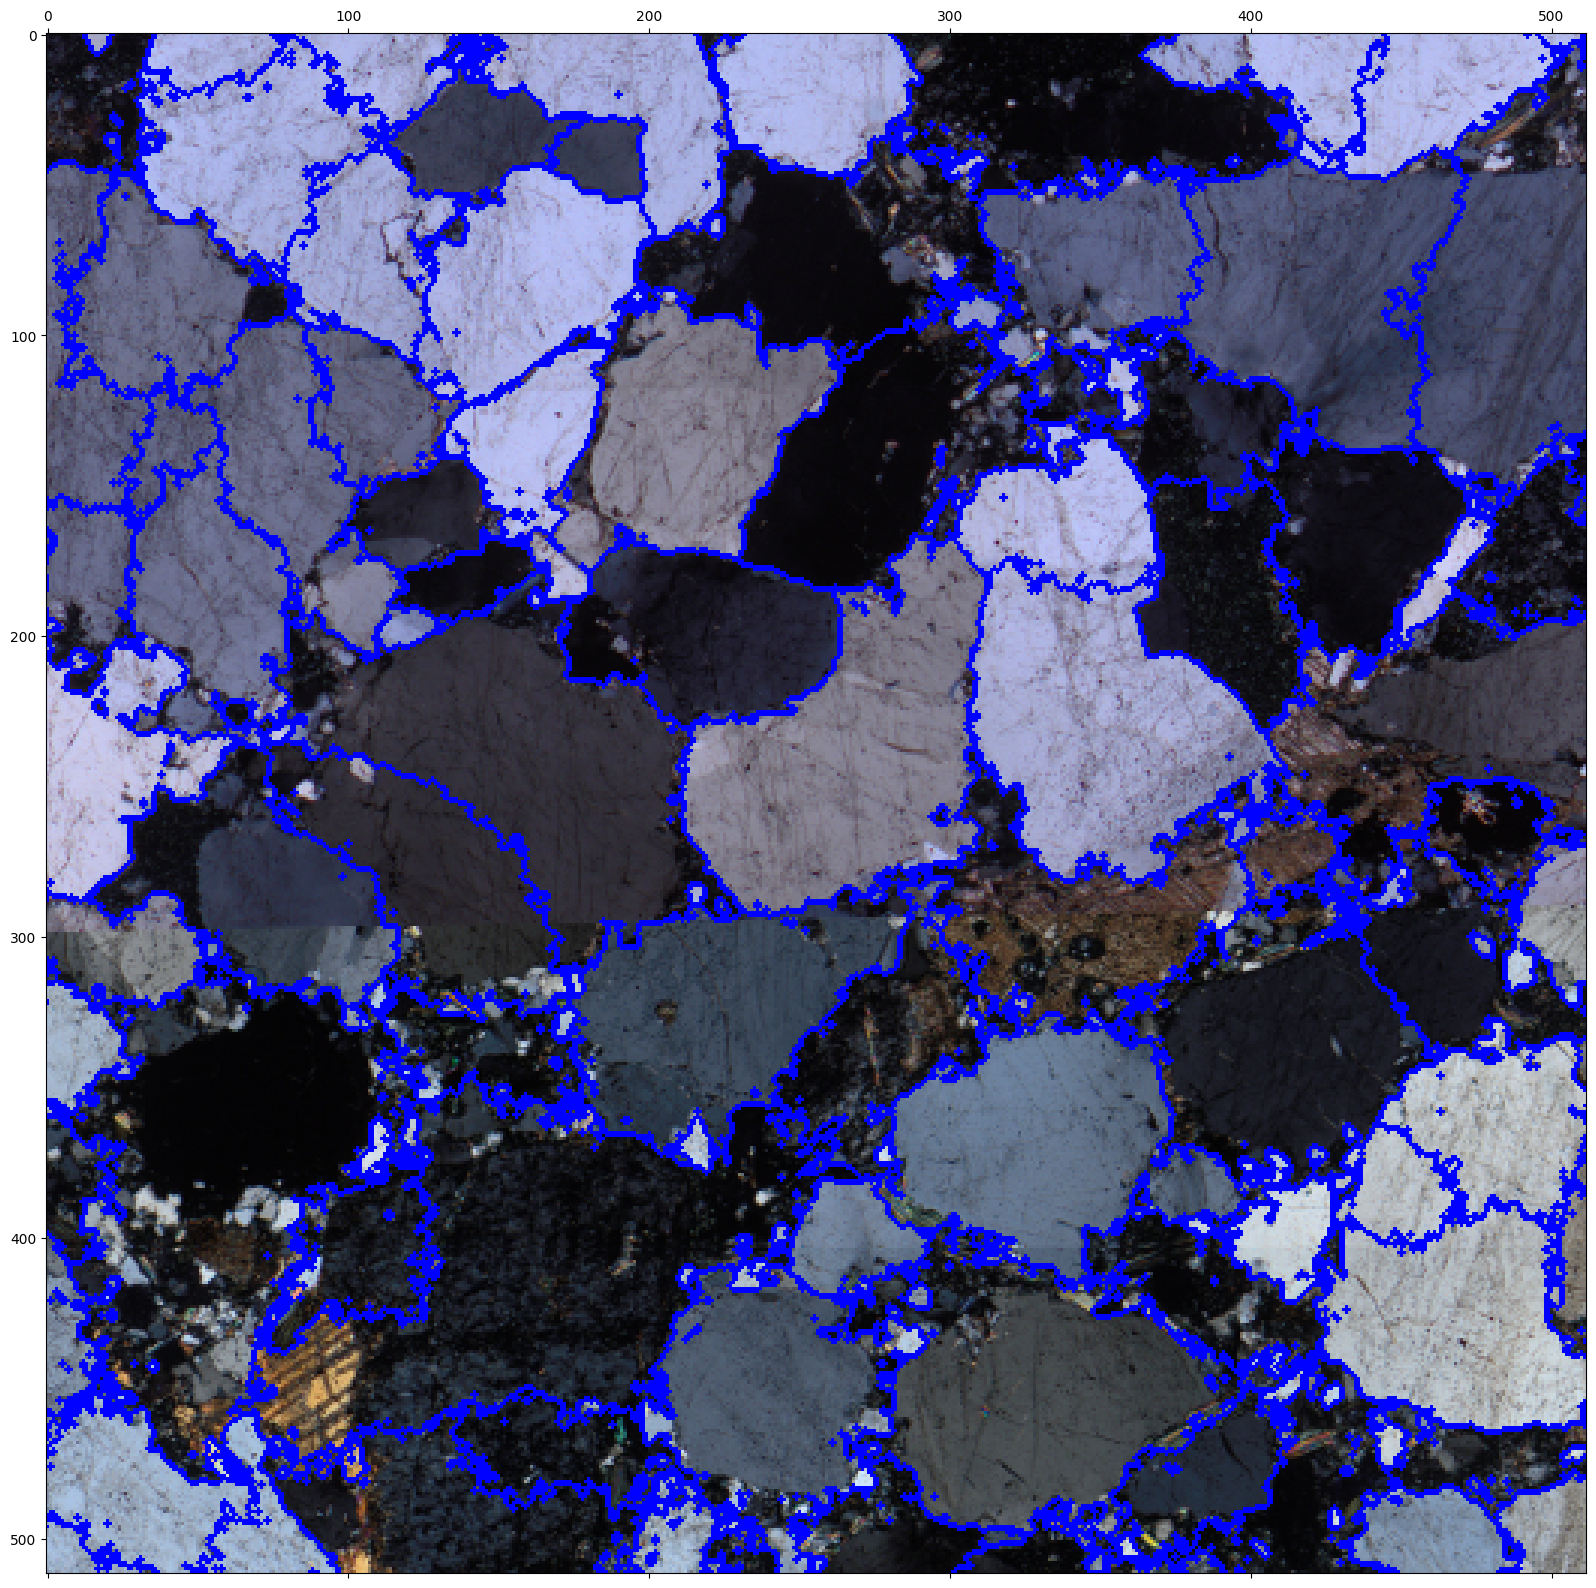

In [110]:
fig, ax = plt.subplots(figsize=(20,20))
seg = segmentation.find_boundaries(gg)
disp = img.copy()
disp[seg>0]= (1,1,255)
ax.matshow(disp[512:1024,512:1024])
print()

In [39]:
from skimage import graph



In [69]:
def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])



In [85]:
#g = graph.rag_boundary(gg, labels)
g = graph.rag_mean_color(img, gg)

In [106]:
labels2 = graph.merge_hierarchical(gg, g, thresh=4, rag_copy=True, in_place_merge=True, merge_func=merge_mean_color, weight_func=_weight_mean_color)



919


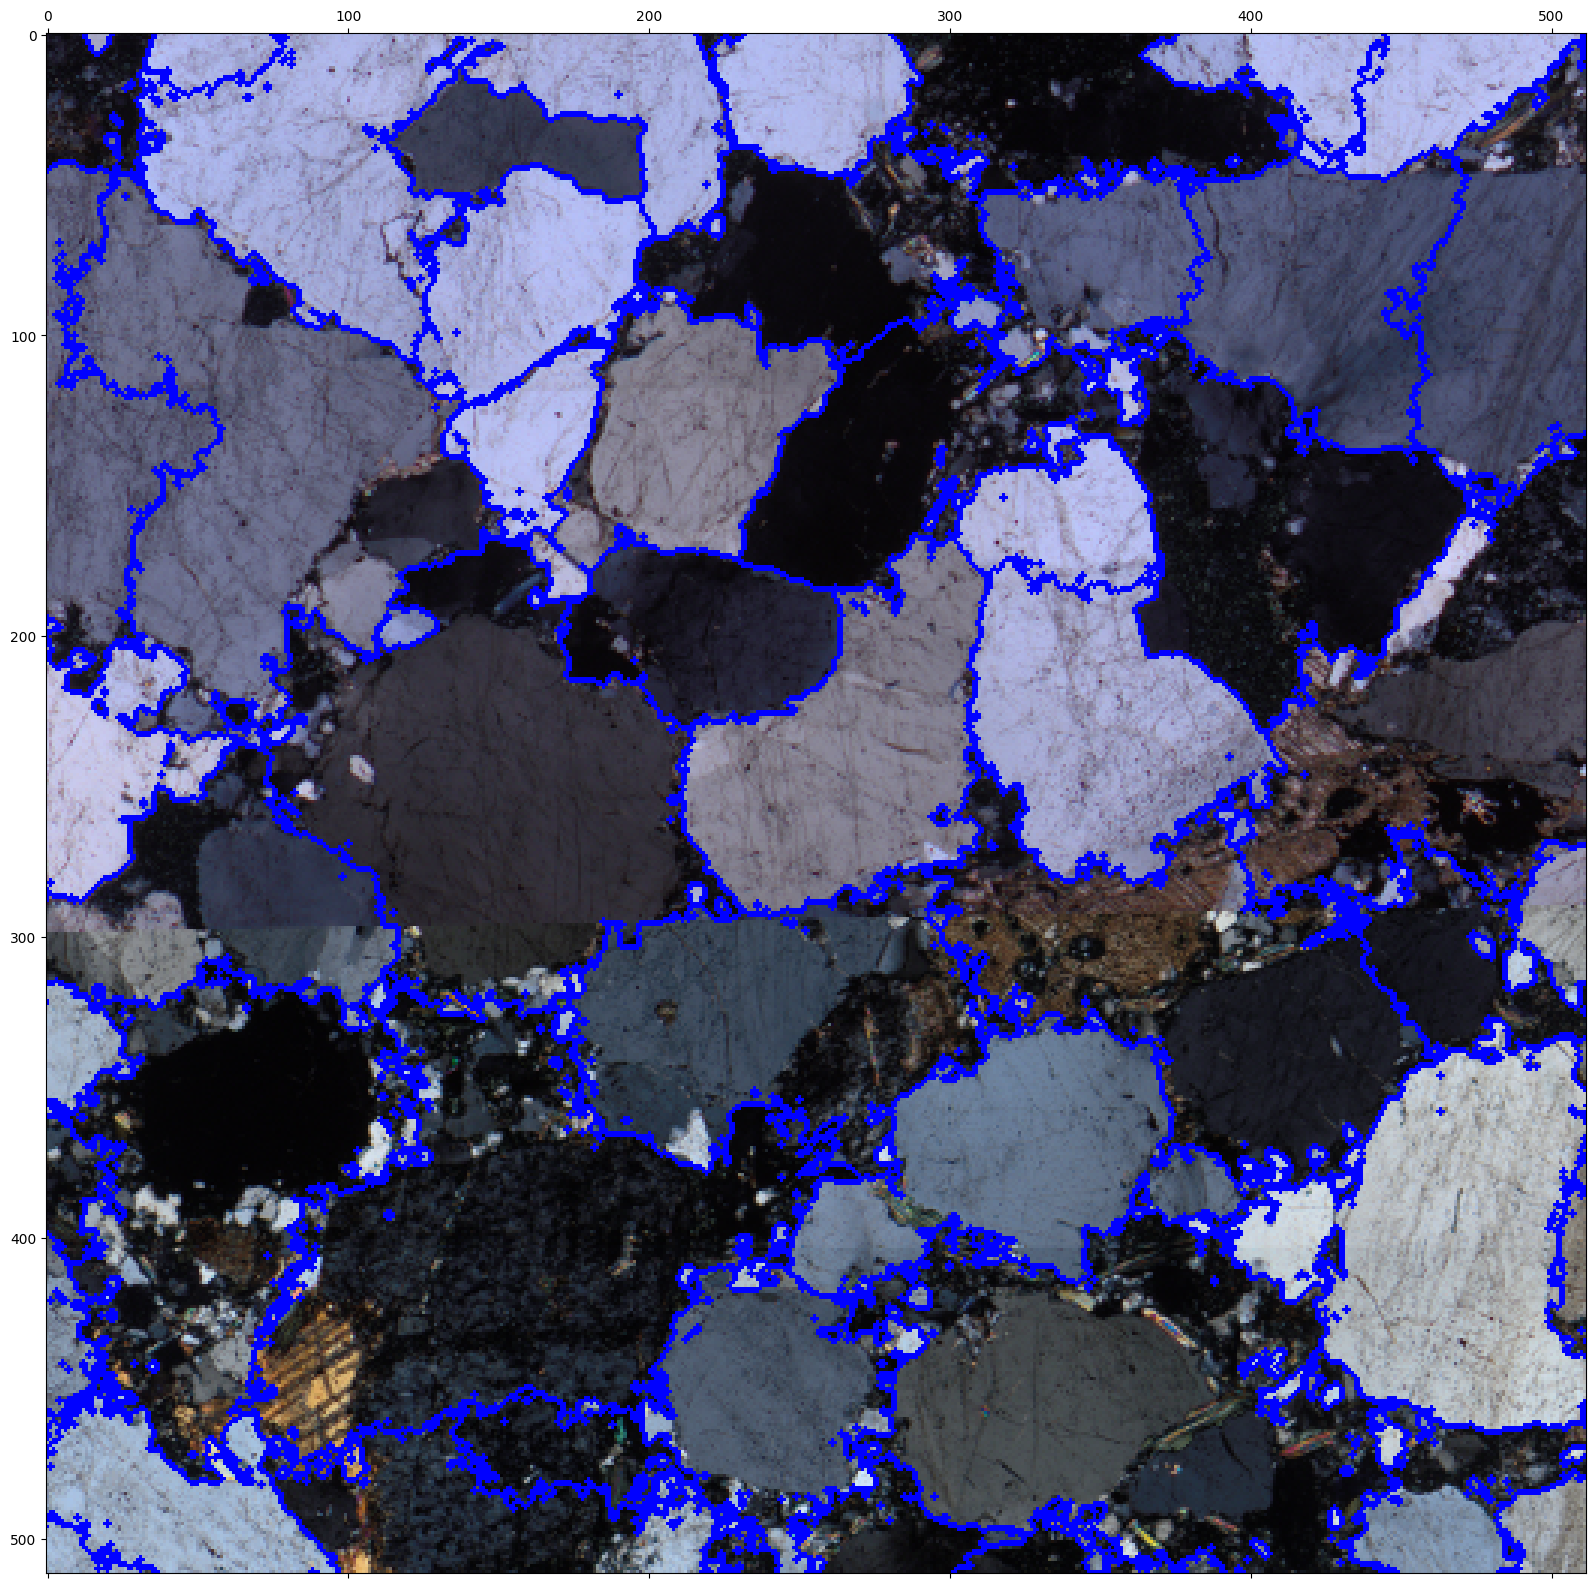

In [107]:
fig, ax = plt.subplots(figsize=(20,20))
seg = segmentation.find_boundaries(labels2)
disp = img.copy()
disp[seg>0]= (1,1,255)
ax.matshow(disp[512:1024,512:1024])
print()
print(labels2.max())